In [ ]:
#decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df=pd.read_csv("FinalDF.csv")
df

,Unnamed: 0,Name,Number,Email ID,Links,Education,Skills,University Name,Years of Experience
0,0,ANIL KUMAR,['+911234567890'],ijayawadaabc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","[('MS', '2016'), 'BTech']","['Sql', 'Debugging', 'Technical', 'Windows', '...",['Velagapudi siddhartha engineering college'],2.4
1,1,Aradhana Tripathi,['+911234567890'],niversity.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","['MS', 'MCA']","['Sql', 'Acquisition', 'Stakeholder management...","['AKS University', ' IIIT ']",4
2,2,Database Engineer,['+911234567890'],knowledge.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","['MS', ('SSC', '2011')]","['Sql', 'Servers', 'Technical', 'Programming',...",['Create ETL Jobs And Monitoring The Jobs ACAD...,NaN
3,3,Chinna Subbarayudu,['+911234567890'],2abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...",['MS'],"['Policies', 'Sql', 'Web services', 'Prototypi...",['Yogi Vemana University'],5.1
4,4,Gopi Krishna,['+911234567890'],annada.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...",['Bachelor of Degree from JNTU - K University ...,"['Specifications', 'Technical', 'Communication...",['JNTU'],3+
...,...,...,...,...,...,...,...,...,...
73,73,WORKDAY |,['+911234567890'],2006.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","[('MTech', '2009'), 'BTech']","['Technical', 'Windows', 'Vendors', 'Programmi...",['Educational Summary: M.Tech in computer scie...,6+
74,74,Tatikonda Kiran,['+911234567890'],yderabad.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","[('SSC', '2009')]","['Web services', 'Technical', 'Schedule', 'Ven...",['Education Qualification .'],3.2
75,75,Workday Consultant,['+911234567890'],scheduling.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...",['Bachelor of Technology (B. Tech) in '],"['Sql', 'Servers', 'Technical', 'Schedule', 'Q...",['Education: Education: Completed Bachelor of ...,5.3
76,76,Workday Functional,['+911234567890'],knowledge.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...",['Master of business administration from Naray...,"['Sql', 'Technical', 'Windows', 'Queries', 'Co...",['EDUCATION SUMMARY Master of business adminis...,4.2


In [4]:
df.head()

,Unnamed: 0,Name,Number,Email ID,Links,Education,Skills,University Name,Years of Experience
0,0,ANIL KUMAR,['+911234567890'],ijayawadaabc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","[('MS', '2016'), 'BTech']","['Sql', 'Debugging', 'Technical', 'Windows', '...",['Velagapudi siddhartha engineering college'],2.4
1,1,Aradhana Tripathi,['+911234567890'],niversity.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","['MS', 'MCA']","['Sql', 'Acquisition', 'Stakeholder management...","['AKS University', ' IIIT ']",4
2,2,Database Engineer,['+911234567890'],knowledge.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...","['MS', ('SSC', '2011')]","['Sql', 'Servers', 'Technical', 'Programming',...",['Create ETL Jobs And Monitoring The Jobs ACAD...,NaN
3,3,Chinna Subbarayudu,['+911234567890'],2abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...",['MS'],"['Policies', 'Sql', 'Web services', 'Prototypi...",['Yogi Vemana University'],5.1
4,4,Gopi Krishna,['+911234567890'],annada.abc@xyz.com,"['https://www.linkedin.com/fake', 'https://www...",['Bachelor of Degree from JNTU - K University ...,"['Specifications', 'Technical', 'Communication...",['JNTU'],3+


In [17]:
df.shape

(78, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           78 non-null     int64 
 1   Name                 78 non-null     object
 2   Number               78 non-null     object
 3   Email ID             78 non-null     object
 4   Links                78 non-null     object
 5   Education            67 non-null     object
 6   Skills               78 non-null     object
 7   University Name      69 non-null     object
 8   Years of Experience  69 non-null     object
dtypes: int64(1), object(8)
memory usage: 5.6+ KB


In [29]:
#label Encoding type column
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df['Name']= label.fit_transform(df['Name'])
df['Number']= label.fit_transform(df['Number'])
df['Email ID']= label.fit_transform(df['Email ID'])
df['Links']= label.fit_transform(df['Links'])
df['Education']= label.fit_transform(df['Education'])
df['Skills']= label.fit_transform(df['Skills'])
df['University Name']= label.fit_transform(df['University Name'])
df['Years of Experience']= label.fit_transform(df['Years of Experience'])


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           78 non-null     int64
 1   Name                 78 non-null     int64
 2   Number               78 non-null     int64
 3   Email ID             78 non-null     int64
 4   Links                78 non-null     int64
 5   Education            78 non-null     int64
 6   Skills               78 non-null     int64
 7   University Name      78 non-null     int64
 8   Years of Experience  78 non-null     int32
dtypes: int32(1), int64(8)
memory usage: 5.3 KB


In [32]:
x=df.iloc[:,0:9]
x

,Unnamed: 0,Name,Number,Email ID,Links,Education,Skills,University Name,Years of Experience
0,0,0,1,31,1,47,47,53,8
1,1,2,1,38,1,22,44,3,20
2,2,7,1,35,1,25,53,10,39
3,3,6,1,7,1,26,33,56,26
4,4,11,1,15,1,9,42,40,13
...,...,...,...,...,...,...,...,...,...
73,73,66,1,3,1,48,67,34,31
74,74,60,1,55,1,49,74,26,16
75,75,67,1,51,1,13,54,29,28
76,76,68,1,35,1,29,58,16,23


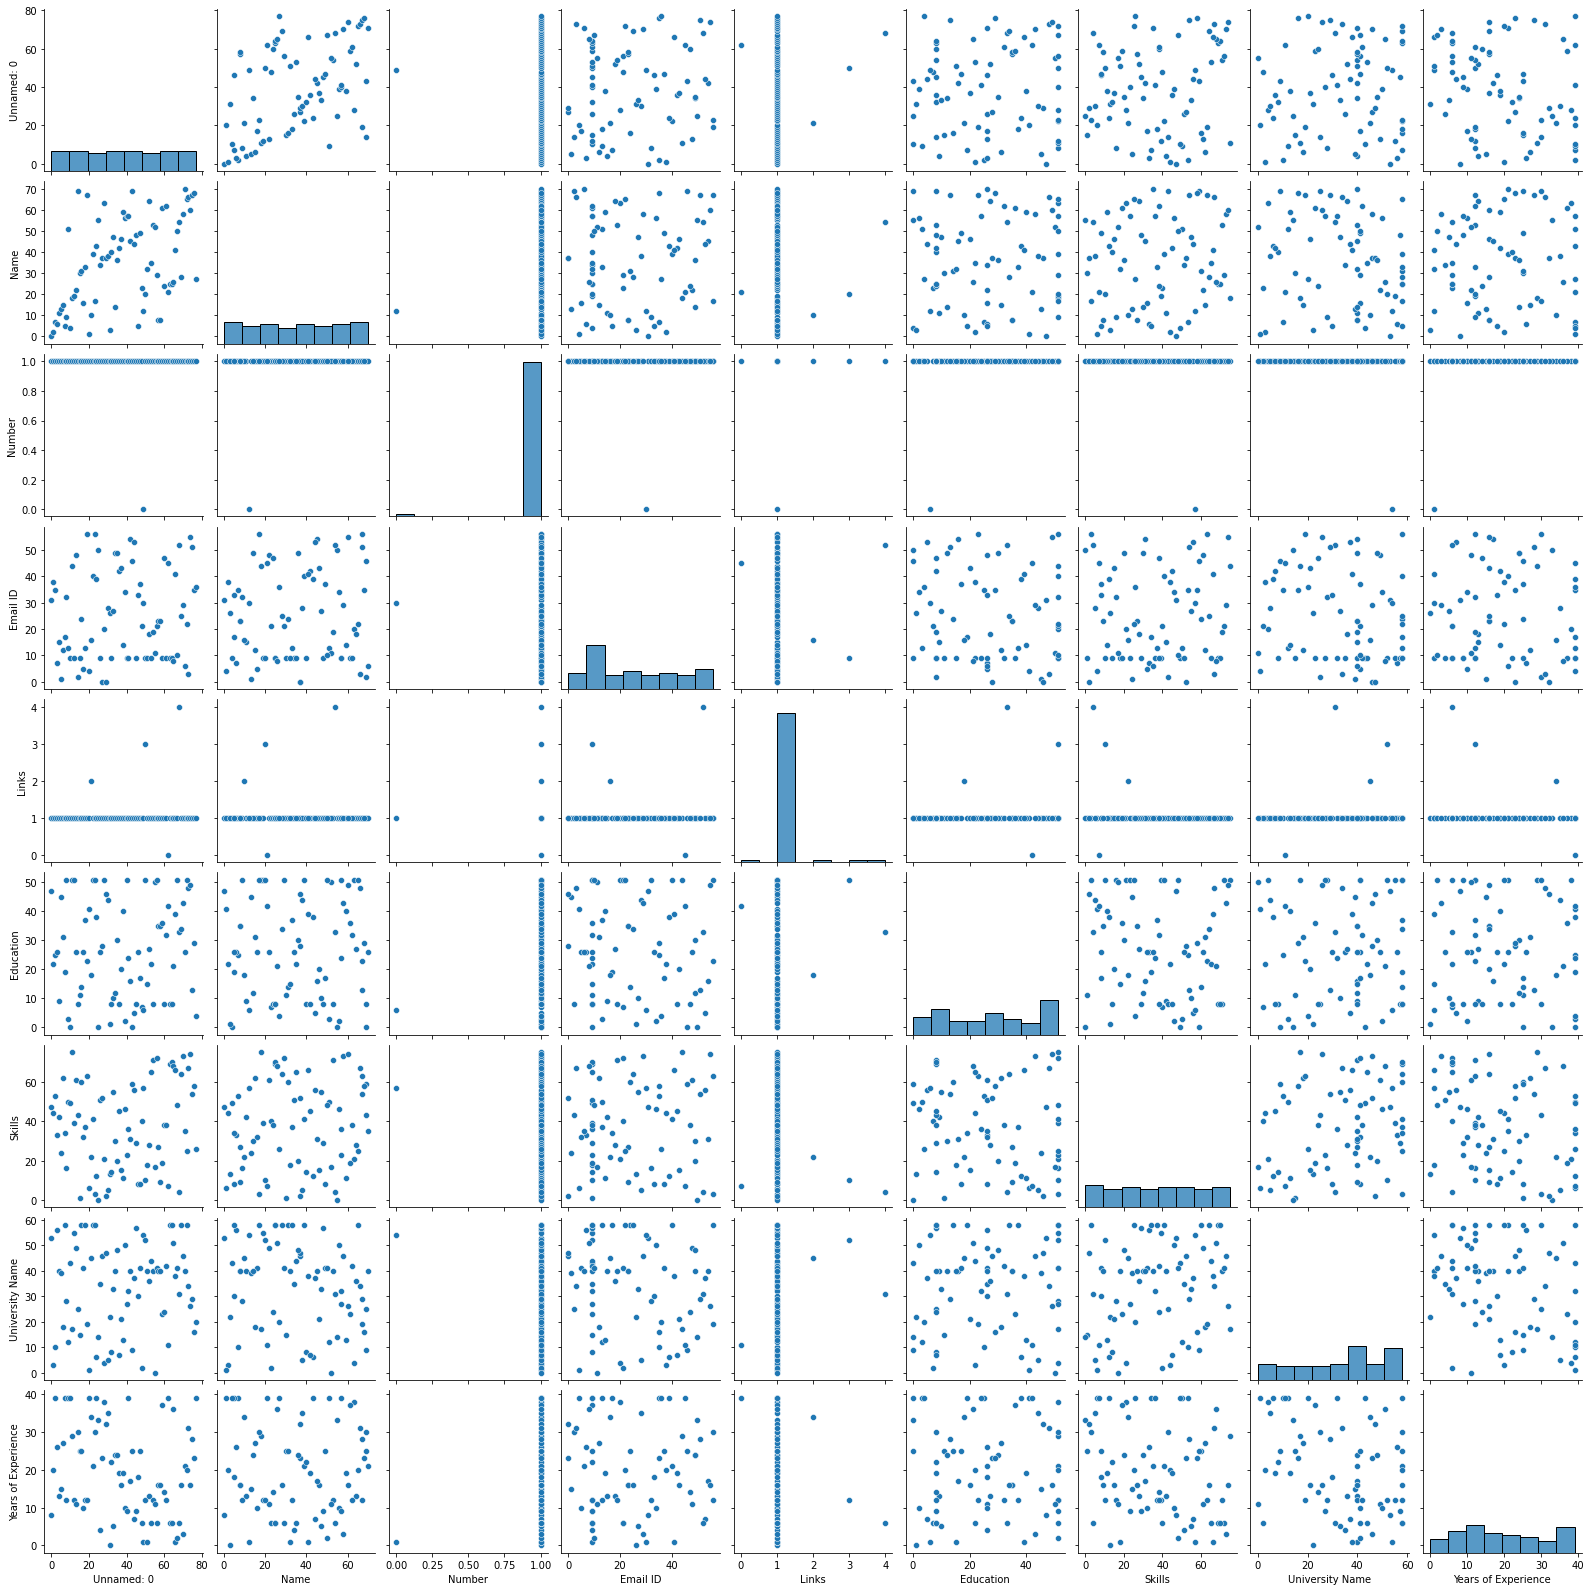

In [62]:
import seaborn as sns

sns.pairplot(df)

In [60]:
y=df.iloc[:,7]
y

0     53
1      3
2     10
3     56
4     40
      ..
73    34
74    26
75    29
76    16
77    20
Name: University Name, Length: 78, dtype: int64

In [34]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

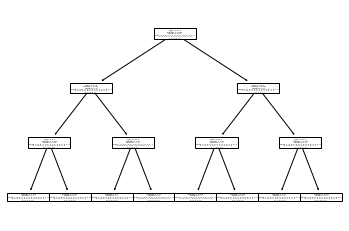

In [36]:
#PLot the decision tree
tree.plot_tree(model);



In [37]:


#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

6     5
21    3
16    2
39    2
30    2
1     1
25    1
dtype: int64

In [38]:

preds

array([ 6, 16,  1, 16, 30, 30, 21,  6, 39, 21, 21, 39, 25,  6,  6,  6])

In [39]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,6,16,21,25,30,39
Years of Experience,,,,,,,
5,1,0,0,0,0,0,0
6,0,2,0,0,0,0,0
8,0,1,0,0,0,0,0
10,0,2,0,0,0,0,0
16,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0
18,0,0,0,1,0,0,0
19,0,0,0,1,0,0,0
20,0,0,0,1,0,0,0


In [40]:
# Accuracy 
np.mean(preds==y_test)

0.375

In [41]:
### Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [42]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.375

In [45]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [47]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [49]:
#Find the accuracy
model.score(x_test,y_test)

0.9926215144341624

In [53]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,pred)
print('Confusion Matrix:','\n', confusion)


Confusion Matrix: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


In [55]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.40      1.00      0.57         2
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          16       0.50      1.00      0.67         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          39       1.00      1.00      1.00         2

    accuracy                           0.38        16
   macro avg       0.18   

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [63]:
#decision tree classifier
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(x_train,y_train)
pred_dt= model_dt.predict(x_test)

#print(model_dt.feature_importances_ )
report_D = classification_report(y_test, pred_dt)
cm_dt = confusion_matrix(y_test, pred_dt)
print("Classification report:")
print(report_D)
print("Confusion matrix:")
print(cm_dt)
print(type(y_test),type(pred_dt))

Classification report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         2
          16       0.50      1.00      0.67         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [64]:
import spacy
import pickle
import random

In [68]:
train_data=pickle.load(open('train_data.pkl','rb'))

In [69]:
train_data

[('Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex

In [70]:
nlp = spacy.blank('en')  
# from spacy.training.example import Example

def train_model(train_data):  # train the model using Name Entity Recognisation method
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
#         ner = nlp.add_pipe('ner')
#         ner = nlp.add_pipe(ner, last = True)
        nlp.add_pipe(ner, last = True)
    
    for _, annotation in train_data:
        for ent in annotation['entities']:
            ner.add_label(ent[2])
          
    
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes): # train only NER
        optimizer = nlp.begin_training()
        for itn in range(15):
            print('Starting iteration ' + str(itn))
            random.shuffle(train_data)
            losses = {}
            index = 0
            for text, annotations in train_data:
                try:
                    nlp.update([text], [annotations], drop =0.2, sgd = optimizer, losses = losses)
                except Exception as e:
                    print(e)
#                     pass
                
            print(losses)    
        

In [73]:
nlp.to_disk('nlp_model')

In [74]:
## Loading the model
nlp_model = spacy.load('nlp_model')

In [75]:
from pdfminer.high_level import extract_text  # is a python package for extracting information from PDF documents.

In [84]:
from pdfminer.high_level import extract_text
## For PDF
text = extract_text('resume.pdf') # extract pdf contain 

In [95]:
## For Doc file

import docx2txt   #  this fuction are used to extract the text from docx files
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None




In [96]:
text

"Resume generator\n\nhttp://nitish.site/resume-generator/\n\nHimanshu Mani Tripathi\n\nB.Tech undergraduate\nComputer Science and Engineering\nNational Institute of Technology, Silchar\n\nEDUCATION\n\n+91-9954964812\nhimanshutripathi366@gmail.com\nhttps://github.com/0dust\n\nDegree/Certificate Institute/Board\nB.Tech\nSenior secondary\nSecondary\n\nNational Institute of Technology, Silchar\nCBSE board\nICSE board\n\nCGPA/Percentage\n9.09 (Current)\n95.2%\n87.4%\n\nYear\n2016 - Present\n2015\n2013\n\nPROJECTS\n\nme.\n\nPROJECTS\n\nSentiment analysis with attention\nAnalysed sentiments of wikipedia comments using\xa0 LSTM with attention\n\nMay 2016 - July 2016\n\nXYZ Engineer at 'ABC'\nDesigned methods to improve the existing unit test mechanism.\n\nKeras Seq2Seq chatbot\nAnalysed the sentiments of wikipedia comments using LSTM networks with attention\nmechanism.\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\n\nStack Overflow Developer Survey\nPerformed 

In [97]:
text = text.replace('\n',' ') # remove \n in text

In [127]:
doc = nlp_model(train_data[0][0])

In [130]:

for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

In [131]:
!pip install pyMuPDF2

ERROR: Could not find a version that satisfies the requirement pyMuPDF2
ERROR: No matching distribution found for pyMuPDF2


In [132]:
import sys,fitz
fname='React Developer_Haripriya.pdf'
doc=fitz.open(fname)
text=""
for page in doc:
    text=text + str(page.getText())
    tx=" ".join(text.split('\n'))
    print(text)

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


HARIPRIYA BATTINA  
Experience as UI Developer in Reactjs, JavaScript.  
Phone: +91 9908576950  
Gmail: haripriyabattini@gmai.com  
Location: Visakhapatnam  
JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an 
objective to be a leading source of information and guidance concerning th 
technological requirements.  
● Want to be a part of a reputed organization that allows me to effectively use my  
technical skills in the real world for overall growth of organization and my  
professional career. 
WORK EXPERIENCE EDUCATION  
1. Associate UI Developr  
Company: Blue Yonder, Hyderabad.  
● Work Done On “COPERNICUS” Project.  
● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially 

HARIPRIYA BATTINA  
Experience as UI Developer in Reactjs, JavaScript.  
Phone: +91 9908576950  
Gmail: haripriyabattini@gmai.com  
Location: Visakhapatnam  
JOB OBJECTIVE ● Looking for a challenging role to put my experie

In [134]:
doc = nlp_model(tx)

for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

In [135]:
import re
details = {}

PHONE_REG = re.compile(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]') # phone no. extraction 
EMAIL_REG = re.compile(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+')  # emial extraction 
LINKED_REG = re.compile('linkedin\.com/in/\w+[a-z0-9-]+\w+')  # linkin url extraction
GITHUB_LINK = re.compile('github\.com/\w+')  # github url extraction
EXP = re.compile(r'\d+[\.]\d+ years')   # experience extraction

# findall() is probably the single most powerful function in the re module. 
# Above we used re.search() to find the first match for a pattern. 
# findall() finds *all* the matches and returns them as a list of strings, with each string representing one match.

phone_number = re.findall(PHONE_REG, text)  # phone no. extraction from resume
email = re.findall(EMAIL_REG, text)         #  emial extraction from resume
linked_in = re.findall(LINKED_REG , text)          #  linkin url extraction  from resume
github = match = re.findall(GITHUB_LINK,  text)   # github url extraction from resume
exp = re.findall(EXP, text)                         # experience extraction from resume

try :
    if len(phone_number) != 0:
        details['PHONE NUMBER'] = phone_number[0]
        print(f'PHONE NUMBER : ' , phone_number[0]) ## number 
    else:
        phone_number = None
        details['PHONE NUMBER'] = phone_number
        print(f'PHONE NUMBER : ' , phone_number) ## number
        
    if len(email) !=0:
        details['EMAIL-ID'] = email[0]
        print(f'EMAIL-ID     : ', email[0] ) ## Email
    else:
        email = None
        details['EMAIL-ID'] = email
        print(f'EMAIL-ID     : ', email ) ## Email
        
        
    if linked_in !=0:
        details['LINKEDIN-LINK'] = linked_in[0]
        print(f'LINKEDIN-LINK     : ', 'https://www.'+linked_in[0]) ## Linkedin
    else:
        linked_in = None
        details['LINKEDIN-LINK'] = linked_in
        print(f'LINKEDIN-LINK     : ', linked_in) ## Linkedin
        
    if len(github) !=0 :
        details['GITHUB-LINK'] = github[0]
        print(f'GITHUB-LINK : ' , 'https://'+ github[0] ) ## number 
    else:
        github = None
        details['GITHUB-LINK'] = github
        print(f'GITHUB-LINK     : ', github)
    if len(exp) !=0 :
        details['YEARS OF EXPERIENCE'] = exp[0]
        print(f'YEARS OF EXPERIENCE : ' ,  exp[0] ) ## number 
    else:
        exp = None
        details['YEARS OF EXPERIENCE'] = exp
        print(f'YEARS OF EXPERIENCE    : ', exp)     
        
except IndexError:
    pass

for ent in doc.ents:
    if ent.label_.upper() == 'SKILLS':
        details['SKILLS'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'NAME':
        details['NAME'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'DEGREE':
        details['DEGREE'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'COLLEGE NAME':
        details['COLLEGE NAME'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'GRADUATION YEAR':
        details['GRADUATION YEAR'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}') 
    elif ent.label_.upper() == 'DESIGNATION':
        details['DESIGNATION'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'COMPANIES WORKED AT':
        details['COMPANIES WORKED AT'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'LOCATION':
        details['LOCATION'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
    elif ent.label_.upper() == 'YEARS OF EXPERIENCE':
        details['YEARS OF EXPERIENCE'] = ent.text
        print(f'{ent.label_.upper():{20}}- {ent.text}')
        

  

PHONE NUMBER :  +91 9908576950
EMAIL-ID     :  haripriyabattini@gmai.com


In [136]:
details.values()

dict_values(['+91 9908576950', 'haripriyabattini@gmai.com'])

In [137]:
col = ['NAME','PHONE NUMBER','EMAIL-ID','LINKEDIN-LINK','GITHUB-LINK','YEARS OF EXPERIENCE',
       'LOCATION','DEGREE','COLLEGE NAME','GRADUATION YEAR','COMPANIES WORKED AT','DESIGNATION','SKILLS']
new_dict = {}
for x in col:
    if x in details.keys():
        new_dict[x] = details[x]
    else:
        new_dict[x]= None

In [138]:
df = pd.DataFrame([new_dict], columns =col )   # data frame of col and new dict

In [139]:
df  # result of dataframe

,NAME,PHONE NUMBER,EMAIL-ID,LINKEDIN-LINK,GITHUB-LINK,YEARS OF EXPERIENCE,LOCATION,DEGREE,COLLEGE NAME,GRADUATION YEAR,COMPANIES WORKED AT,DESIGNATION,SKILLS
0,None,+91 9908576950,haripriyabattini@gmai.com,None,None,None,None,None,None,None,None,None,None


In [140]:
for x , y in details.items():
    print(f'{x:{20}} : {y}') 

PHONE NUMBER         : +91 9908576950
EMAIL-ID             : haripriyabattini@gmai.com


In [141]:
## Reading multiple files at once

In [142]:
new = ['Resumes2.docx', 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf']  # resumes more than one 

In [143]:
f = []
for x in new:
    file = x.split('.')
    f.append(file[1])

In [144]:
text = []
for t in range(len(new)):
    if f[t] == 'pdf':
        text.append(extract_text(new[t]))
    elif f[t] == 'docx':
        text.append((extract_text_from_docx(new[t])))

In [145]:

len(text)

2

In [146]:
details = {'NAME':[] ,'PHONE NUMBER':[] ,'EMAIL-ID':[],'LINKEDIN-LINK':[],'GITHUB-LINK':[],'YEARS OF EXPERIENCE':[],
       'LOCATION':[],'DEGREE':[],'COLLEGE NAME':[],'GRADUATION YEAR':[],'COMPANIES WORKED AT':[],'DESIGNATION':[],'SKILLS':[]}

for x in range(len(text)):

    new_text = text[x].replace('\n', ' ')  # remove \n in text
    doc = nlp_model(new_text)
    PHONE_REG = re.compile(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]')
    EMAIL_REG = re.compile(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+')
    LINKED_REG = re.compile('linkedin\.com/in/\w+[a-z0-9-]+\w+')
    GITHUB_LINK = re.compile('github\.com/\w+')
    EXP = re.compile(r'\d+[\.]\d+ years')

    phone_number = re.findall(PHONE_REG, new_text)
    email = re.findall(EMAIL_REG, new_text)
    linked_in = re.findall(LINKED_REG , new_text)
    github = match = re.findall(GITHUB_LINK, new_text)
    exp = re.findall(EXP,new_text)

    try :
        if len(phone_number) != 0:
            details['PHONE NUMBER'].append(phone_number[0])
            print(f'PHONE NUMBER : ' , phone_number[0]) ## number 
        else:
            phone_number = None
            details['PHONE NUMBER'].append(phone_number)
            print(f'PHONE NUMBER : ' , phone_number) ## number

        if len(email) !=0:
            details['EMAIL-ID'].append(email[0])
            print(f'EMAIL-ID     : ', email[0] ) ## Email
        else:
            email = None
            details['EMAIL-ID'].append(email)
            print(f'EMAIL-ID     : ', email ) ## Email


        if linked_in !=0:
            details['LINKEDIN-LINK'].append(linked_in[0])
            print(f'LINKEDIN-LINK     : ', 'https://www.'+linked_in[0]) ## Linkedin
        else:
            linked_in = None
            details['LINKEDIN-LINK'].append(linked_in)
            print(f'LINKEDIN-LINK     : ', linked_in) ## Linkedin

        if len(github) !=0 :
            details['GITHUB-LINK'].append(github[0])
            print(f'GITHUB-LINK : ' , 'https://'+ github[0] ) ## Github 
        else:
            github = None
            details['GITHUB-LINK'].append(github)
            print(f'GITHUB-LINK     : ', github)
        if len(exp) !=0 :
            details['YEARS OF EXPERIENCE'].append(exp[0])
            print(f'YEARS OF EXPERIENCE : ' ,  exp[0] ) ## Years of experience 
        else:
            exp = None
            details['YEARS OF EXPERIENCE'].append(exp)
            print(f'YEARS OF EXPERIENCE    : ', exp)     

    except IndexError:
        pass

    for ent in doc.ents:
        if ent.label_.upper() == 'SKILLS':
            details['SKILLS'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'NAME':
            details['NAME'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'DEGREE':
            details['DEGREE'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'COLLEGE NAME':
            details['COLLEGE NAME'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'GRADUATION YEAR':
            details['GRADUATION YEAR'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}') 
        elif ent.label_.upper() == 'DESIGNATION':
            details['DESIGNATION'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'COMPANIES WORKED AT':
            details['COMPANIES WORKED AT'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'LOCATION':
            details['LOCATION'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')
        elif ent.label_.upper() == 'YEARS OF EXPERIENCE':
            details['YEARS OF EXPERIENCE'].append(ent.text)
            print(f'{ent.label_.upper():{20}}- {ent.text}')

    print('\n')
    
    

PHONE NUMBER :  None
EMAIL-ID     :  None


PHONE NUMBER :  None
EMAIL-ID     :  None




In [147]:
col = ['NAME','PHONE NUMBER','EMAIL-ID','LINKEDIN-LINK','GITHUB-LINK','YEARS OF EXPERIENCE',
       'LOCATION','DEGREE','COLLEGE NAME','GRADUATION YEAR','COMPANIES WORKED AT','DESIGNATION','SKILLS']
new_dict = {}
for x in col:
    if x in details.keys():
        new_dict[x] = details[x]
    else:
        new_dict[x]= None

In [125]:
df=pd.DataFrame.from_dict(new_dict,orient='index').transpose()

In [126]:
df

,NAME,PHONE NUMBER,EMAIL-ID,LINKEDIN-LINK,GITHUB-LINK,YEARS OF EXPERIENCE,LOCATION,DEGREE,COLLEGE NAME,GRADUATION YEAR,COMPANIES WORKED AT,DESIGNATION,SKILLS
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None
